In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a_x = np.random.normal(2, .5, 50)
a_y = np.random.normal(3, 1.2, 50)

In [5]:
b_x = np.random.normal(1, .3, 50)
b_y = np.random.normal(10, .8, 50)

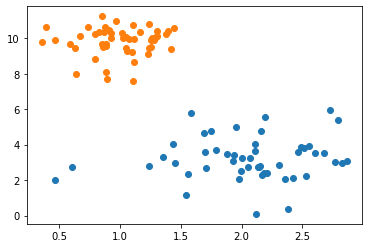

In [7]:
fig, ax = plt.subplots()
ax.scatter(a_x, a_y)
ax.scatter(b_x, b_y)
plt.show()

In [11]:
x = np.concatenate([a_x, b_x])
y = np.concatenate([a_y, b_y])

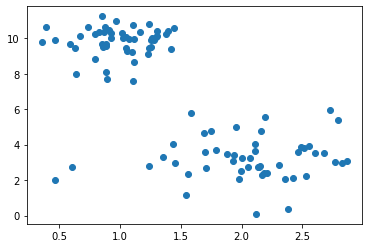

In [12]:
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

In [14]:
data = pd.DataFrame({'x': x, 'y': y})

In [15]:
data

,x,y
0,2.556267,3.940992
1,2.379543,0.373727
2,2.113837,4.023238
3,1.580128,5.777491
4,1.747986,4.766675
...,...,...
95,0.862175,9.484939
96,1.239636,9.434065
97,0.970234,10.959552
98,0.360344,9.787708


In [20]:
k = 2

minimum = data.min().values
maximum = data.max().values

In [26]:
centroidi = np.random.uniform(minimum, maximum, (k, minimum.shape[0]))

In [27]:
centroidi

array([[2.53779909, 8.94835412],
       [2.0794133 , 5.86597783]])

In [33]:
centroidi.T[0]

array([8.94835412, 5.86597783])

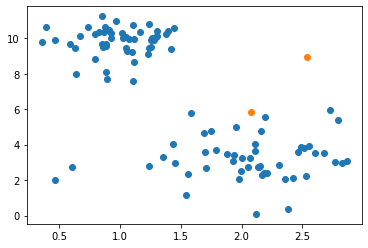

In [34]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.scatter(centroidi.T[0], centroidi.T[1])
plt.show()

In [43]:
data.loc[0,].values

array([2.55626672, 3.94099245])

In [41]:
centroidi[0]

array([2.53779909, 8.94835412])

In [47]:
np.sqrt(np.sum((data.loc[0,].values - centroidi[0])**2))

5.0073957277828915

In [48]:
np.sqrt(np.sum((data.loc[0,].values - centroidi[1])**2))

1.9831686502397587

In [51]:
for j in range(k):
    dist = np.sqrt(np.sum((data.loc[0,].values - centroidi[j])**2))
    print(dist)

5.0073957277828915
1.9831686502397587


In [56]:
dists = []
for j in range(k):
    dists.append(np.sqrt(np.sum((data.loc[0,].values - centroidi[j])**2)))
    
c = np.argmin(dists)

In [65]:
label = []
for i, row in data.iterrows():
    dists = []
    for j in range(k):
        dists.append(np.sqrt(np.sum((row.values - centroidi[j])**2)))

    label.append(np.argmin(dists))

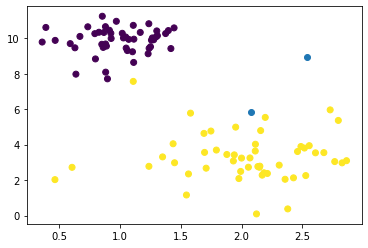

In [68]:
fig, ax = plt.subplots()
ax.scatter(x, y, c=label)
ax.scatter(centroidi.T[0], centroidi.T[1])
plt.show()

In [80]:
for i in range(k):
    centroidi[i] = data.loc[np.where(np.array(label) == i)].mean().values

In [82]:
centroidi

array([[0.99382837, 9.87300973],
       [2.03456377, 3.30571164]])

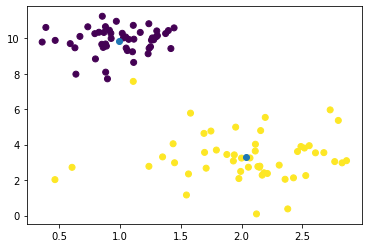

In [83]:
fig, ax = plt.subplots()
ax.scatter(x, y, c=label)
ax.scatter(centroidi.T[0], centroidi.T[1])
plt.show()

In [86]:
label = []
for i, row in data.iterrows():
    dists = []
    for j in range(k):
        dists.append(np.sqrt(np.sum((row.values - centroidi[j])**2)))

    label.append(np.argmin(dists))

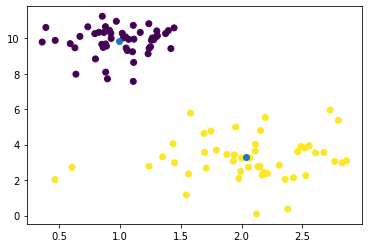

In [87]:
fig, ax = plt.subplots()
ax.scatter(x, y, c=label)
ax.scatter(centroidi.T[0], centroidi.T[1])
plt.show()

In [93]:
k = 2
max_iter = 10

centroidi = np.random.uniform(minimum, maximum, (k, minimum.shape[0]))

iteration = 0
centroidi_precedenti = None

while iteration < max_iter and np.not_equal(centroidi, centroidi_precedenti).any():
    label = []
    for i, row in data.iterrows():
        dists = []
        for j in range(k):
            dists.append(np.sqrt(np.sum((row.values - centroidi[j])**2)))

        label.append(np.argmin(dists))
        
    centroidi_precedenti = centroidi.copy()
    
    for i in range(k):
        centroidi[i] = data.loc[np.where(np.array(label) == i)].mean().values
    
    iteration += 1

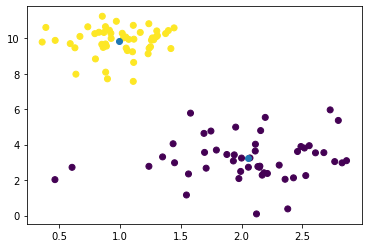

In [97]:
fig, ax = plt.subplots()
ax.scatter(x, y, c=label)
ax.scatter(centroidi.T[0], centroidi.T[1])
plt.show()

In [98]:
iteration

3

In [103]:
k = 5
max_iter = 10

centroidi = np.random.uniform(minimum, maximum, (k, minimum.shape[0]))

iteration = 0
centroidi_precedenti = None

while iteration < max_iter and np.not_equal(centroidi, centroidi_precedenti).any():
    label = []
    for i, row in data.iterrows():
        dists = []
        for j in range(k):
            dists.append(np.sqrt(np.sum((row.values - centroidi[j])**2)))

        label.append(np.argmin(dists))
        
    centroidi_precedenti = centroidi.copy()
    
    for i in range(k):
        centroidi[i] = data.loc[np.where(np.array(label) == i)].mean().values
    
    iteration += 1

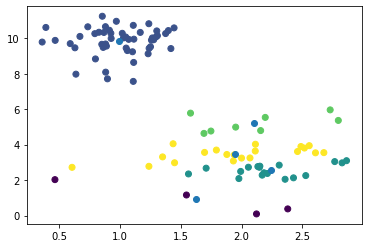

In [104]:
fig, ax = plt.subplots()
ax.scatter(x, y, c=label)
ax.scatter(centroidi.T[0], centroidi.T[1])
plt.show()

In [118]:
class KMedie:
    
    def __init__(self, k=2, max_iter=100):
        self.k = k
        self.max_iter = max_iter
        
    def fit(self, X):
        minimum, maximum = np.min(X, axis=0), np.max(X, axis=0)
        self.centroidi = np.random.uniform(minimum, maximum, (self.k, X.shape[1]))
        
        iteration = 0
        centroidi_precedenti = None
        
        while iteration < self.max_iter and np.not_equal(self.centroidi, centroidi_precedenti).any():
            label = []
            for row in X:
                dists = []
                for j in range(self.k):
                    dists.append(np.sqrt(np.sum((row - self.centroidi[j])**2)))

                label.append(np.argmin(dists))

            centroidi_precedenti = self.centroidi.copy()

            for i in range(self.k):
                self.centroidi[i] = X[np.where(np.array(label) == i)].mean(axis=0)

            iteration += 1
        
        self.labels = label

In [119]:
data = np.stack([x, y], axis=1)

In [120]:
model = KMedie(k=2, max_iter=10)

In [121]:
model.fit(data)

In [122]:
model.centroidi

array([[2.05306716, 3.22046261],
       [0.99613968, 9.8269128 ]])

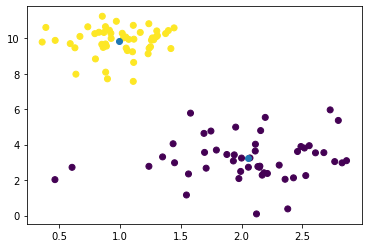

In [124]:
fig, ax = plt.subplots()
ax.scatter(x, y, c=model.labels)
ax.scatter(model.centroidi.T[0], model.centroidi.T[1])
plt.show()